<a href="https://colab.research.google.com/github/dikoharyadhanto/Geopandas-Documentation/blob/main/003_Extract_elevation_from_a_DEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 26.7 MB/s 
     |████████████████████████████████| 6.3 MB 52.4 MB/s 
     |████████████████████████████████| 16.7 MB 43.5 MB/s 


In [30]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [4]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Extract Dataset ZIP
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Data/Spatial/Extract elevation from a DEM.zip", 'r')
zip_ref.extractall("/tmp/Extract_DEM")
zip_ref.close()

In [6]:
url = '/tmp/Extract_DEM/Extract elevation from a DEM/stations.shp'

In [8]:
#Read attribute table
stasiun_gdf = gpd.read_file(url)
stasiun_gdf

,Id,name,geometry
0,0,station1,POINT (116.66012 6.20102)
1,0,station2,POINT (116.86285 6.10965)
2,0,station3,POINT (117.12412 6.12821)
3,0,station4,POINT (117.29115 6.30524)
4,0,station5,POINT (116.91996 6.35664)
5,0,station6,POINT (117.03846 6.51511)
6,0,station7,POINT (116.85286 6.64931)
7,0,station8,POINT (116.68868 6.63646)
8,0,station9,POINT (117.28544 6.58078)


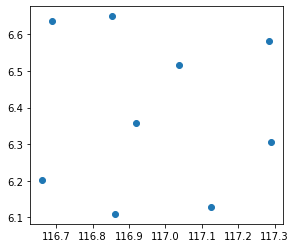

In [9]:
stasiun_gdf.plot()

# **Get The x,y Values with iteration from Geometry Column**

In [20]:
for index,row in stasiun_gdf.iterrows():
  print('Row ', index, '\n', row, '\n')

Row  0 
 Id                                                    0
name                                           station1
geometry    POINT (116.6601216379696 6.201023003794654)
Name: 0, dtype: object 

Row  1 
 Id                                                     0
name                                            station2
geometry    POINT (116.86285171566632 6.109651701170772)
Name: 1, dtype: object 

Row  2 
 Id                                                     0
name                                            station3
geometry    POINT (117.12411653410649 6.128211497016248)
Name: 2, dtype: object 

Row  3 
 Id                                                     0
name                                            station4
geometry    POINT (117.29115469671578 6.305243395850018)
Name: 3, dtype: object 

Row  4 
 Id                                                     0
name                                            station5
geometry    POINT (116.91995877980625 6.356639753575951)
Nam

In [21]:
#list of name station with iteration
for index,row in stasiun_gdf.iterrows():
  print(row['name'])

station1
station2
station3
station4
station5
station6
station7
station8
station9


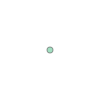

In [22]:
row['geometry'] #will show the last point of iteration

In [24]:
#Extract the exact coordinates of geometry
print('x = ', row['geometry'].x)
print('y = ', row['geometry'].y)

x =  117.28544399030179
y =  6.580784980325159


In [26]:
#Extract attributes from the station shapefiles
for index,row in stasiun_gdf.iterrows():
  name = row['name']
  longitude = row['geometry'].x
  latitude = row['geometry'].y
  print(name, ' = ', '(', longitude, ', ', latitude, ')')

station1  =  ( 116.6601216379696 ,  6.201023003794654 )
station2  =  ( 116.86285171566632 ,  6.109651701170772 )
station3  =  ( 117.12411653410649 ,  6.128211497016248 )
station4  =  ( 117.29115469671578 ,  6.305243395850018 )
station5  =  ( 116.91995877980625 ,  6.356639753575951 )
station6  =  ( 117.0384559378966 ,  6.5151118565642445 )
station7  =  ( 116.85285797944185 ,  6.64931345729307 )
station8  =  ( 116.68867517003956 ,  6.6364643678615876 )
station9  =  ( 117.28544399030179 ,  6.580784980325159 )


# **Extract The Specific DEM Elevation Values to Each Station**

In [33]:
#Extract the specific dem elevation values to each station
import rasterio

for index,row in stasiun_gdf.iterrows():
  name = row['name']
  longitude = row['geometry'].x
  latitude = row['geometry'].y
  print(name, ' = ', '(', longitude, ', ', latitude, ')')
  
  #Reading the DEM using Rasterio
  dem = rasterio.open('/tmp/Extract_DEM/Extract elevation from a DEM/DEM.tif')
  row, col = dem.index(longitude, latitude)
  dem_data = dem.read(1)

  print('the elevation of ' + name, ': ' + str(dem_data[row, col]) + ' meters\n')

station1  =  ( 116.6601216379696 ,  6.201023003794654 )
the elevation of station1 : 2570 meters

station2  =  ( 116.86285171566632 ,  6.109651701170772 )
the elevation of station2 : 204 meters

station3  =  ( 117.12411653410649 ,  6.128211497016248 )
the elevation of station3 : 191 meters

station4  =  ( 117.29115469671578 ,  6.305243395850018 )
the elevation of station4 : 117 meters

station5  =  ( 116.91995877980625 ,  6.356639753575951 )
the elevation of station5 : 774 meters

station6  =  ( 117.0384559378966 ,  6.5151118565642445 )
the elevation of station6 : 291 meters

station7  =  ( 116.85285797944185 ,  6.64931345729307 )
the elevation of station7 : 49 meters

station8  =  ( 116.68867517003956 ,  6.6364643678615876 )
the elevation of station8 : 399 meters

station9  =  ( 117.28544399030179 ,  6.580784980325159 )
the elevation of station9 : 82 meters



# **Add Elevation Column and Record DEM Elevation Value Into GeoDataFrame**

In [34]:
#Add Elevation column and Record DEM elevation values into GeoDataFrame

#Create empty column
stasiun_gdf['elevation'] = 0

#Extract the specific dem elevation values to each station
import rasterio

for index,row in stasiun_gdf.iterrows():
  name = row['name']
  longitude = row['geometry'].x
  latitude = row['geometry'].y
  print(name, ' = ', '(', longitude, ', ', latitude, ')')
  
  #Reading the DEM using Rasterio
  dem = rasterio.open('/tmp/Extract_DEM/Extract elevation from a DEM/DEM.tif')
  row, col = dem.index(longitude, latitude)
  dem_data = dem.read(1)

  print('the elevation of ' + name, ': ' + str(dem_data[row, col]) + ' meters\n')

  #Record elevation values to elevation column on 'stasiun' DataFrame
  stasiun_gdf['elevation'].loc[index] = dem_data[row,col]

station1  =  ( 116.6601216379696 ,  6.201023003794654 )
the elevation of station1 : 2570 meters

station2  =  ( 116.86285171566632 ,  6.109651701170772 )
the elevation of station2 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


: 204 meters

station3  =  ( 117.12411653410649 ,  6.128211497016248 )
the elevation of station3 : 191 meters

station4  =  ( 117.29115469671578 ,  6.305243395850018 )
the elevation of station4 : 117 meters

station5  =  ( 116.91995877980625 ,  6.356639753575951 )
the elevation of station5 : 774 meters

station6  =  ( 117.0384559378966 ,  6.5151118565642445 )
the elevation of station6 : 291 meters

station7  =  ( 116.85285797944185 ,  6.64931345729307 )
the elevation of station7 : 49 meters

station8  =  ( 116.68867517003956 ,  6.6364643678615876 )
the elevation of station8 : 399 meters

station9  =  ( 117.28544399030179 ,  6.580784980325159 )
the elevation of station9 : 82 meters



In [36]:
stasiun_gdf.head()

,Id,name,geometry,elevation
0,0,station1,POINT (116.66012 6.20102),2570
1,0,station2,POINT (116.86285 6.10965),204
2,0,station3,POINT (117.12412 6.12821),191
3,0,station4,POINT (117.29115 6.30524),117
4,0,station5,POINT (116.91996 6.35664),774
